### CONTINUOUS ASSESSMENT MACHINE LEARNING AND DATA PREPARATION 

#### DATA PREPARATION

## CHARACTERISATION OF THE DATA SET

In [1]:
# using pandas library for handling, manipulating, and analyzing data 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
from matplotlib import colormaps # we want to visualize how the missing values are distributed 
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
#using pandas library for reading the data
df = pd.read_excel('biking_dataset.xlsx')

In [3]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12


In [4]:
df.tail()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
895,New York,Rainy,55.0,Electric,55.0,28.35,Medium,26.30
896,London,Cloudy,47.0,Mountain,14.0,11.99,High,13.78
897,San Francisco,Sunny,49.0,Mountain,23.0,2.78,High,20.47
898,Chicago,Sunny,19.0,Mountain,110.0,2.27,High,39.62
899,Dublin,Rainy,37.0,Standard,17.0,9.70,Medium,13.02


### Number of obervations and features

In [5]:
df.shape

(900, 8)

### Missing values

In [6]:
df.count()

City                     890
Weather Condition        889
Rider Age                885
Bike Model               890
Ride Duration (min)      887
Distance Covered (km)    887
Rider Satisfaction       889
Bike Rental Cost ($)     891
dtype: int64

### Data types

In [7]:
df.dtypes

City                      object
Weather Condition         object
Rider Age                float64
Bike Model                object
Ride Duration (min)      float64
Distance Covered (km)    float64
Rider Satisfaction        object
Bike Rental Cost ($)     float64
dtype: object

In [8]:
df.describe()

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($)
count,885.000000,887.000000,887.000000,891.000000
mean,39.264407,62.225479,20.130530,26.581470
std,12.373803,33.956434,11.178777,9.438224
min,18.000000,5.000000,0.510000,7.330000
25%,29.000000,32.000000,10.830000,19.210000
50%,39.000000,62.000000,19.990000,27.040000
75%,50.000000,92.000000,29.155000,33.955000
max,60.000000,120.000000,39.870000,48.380000


In [9]:
df.describe(include=object)

,City,Weather Condition,Bike Model,Rider Satisfaction
count,890,889,890,889
unique,6,4,4,3
top,London,Rainy,Mountain,High
freq,186,245,298,319


### Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


# Exploratory Data Analysis 

### Dropping the duplicate rows


In [11]:
duplicate_rows_df = df[df.duplicated()] #we are finding the duplicates
print("number of duplicate rows: ",duplicate_rows_df.shape) #showing the number of duplicates

number of duplicate rows:  (0, 8)


### Filling in the missing or null values

In [12]:
print(df.isnull().sum()) #counting the number of missing values 

City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64


In [13]:

list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Axes: >

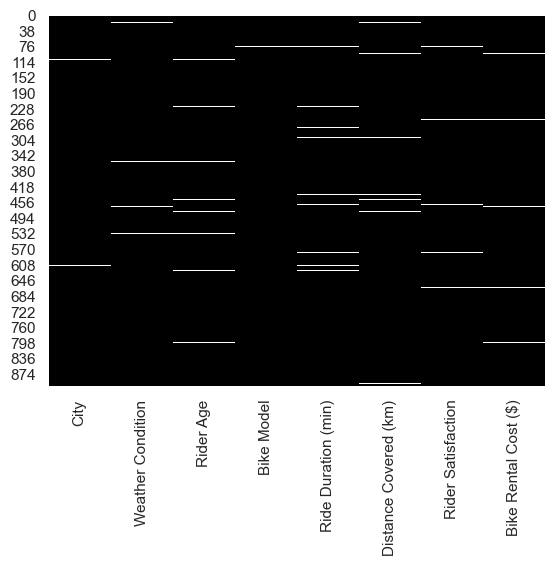

In [14]:
sns.heatmap(df.isnull(), cbar=False, cmap='gist_heat')

In [15]:
# Replace the NaN with the mode
df['City'] = df['City'].fillna('London')
df['Weather Condition'] = df['Weather Condition'].fillna('Rainy')
df['Bike Model'] = df['Bike Model'].fillna('Mountain')
df['Rider Satisfaction'] = df['Rider Satisfaction'].fillna('High')

## replace the numerical features with the mean

df['Rider Age'] = df['Rider Age'].fillna(df['Rider Age'].mean())
df['Ride Duration (min)'] = df['Ride Duration (min)'].fillna(df['Ride Duration (min)'].mean())
df['Distance Covered (km)'] = df['Distance Covered (km)'].fillna(df['Distance Covered (km)'].mean())
df['Bike Rental Cost ($)'] = df['Bike Rental Cost ($)'].fillna(df['Bike Rental Cost ($)'].mean())

In [16]:
print(df.isnull().sum()) #counting the number of missing values 

City                     0
Weather Condition        0
Rider Age                0
Bike Model               0
Ride Duration (min)      0
Distance Covered (km)    0
Rider Satisfaction       0
Bike Rental Cost ($)     0
dtype: int64


<Axes: >

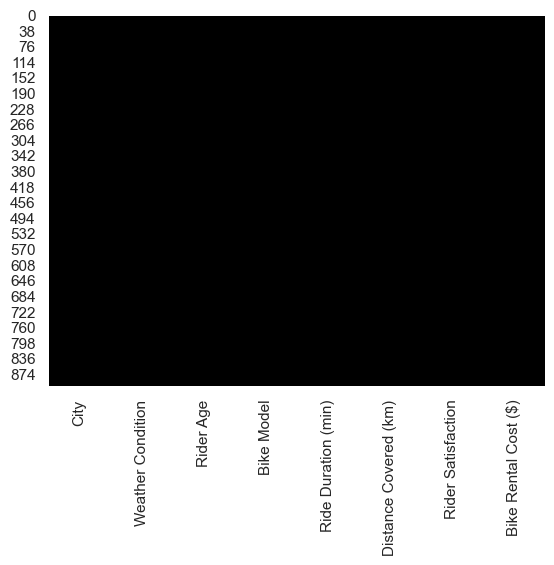

In [17]:
sns.heatmap(df.isnull(), cbar=False, cmap='gist_heat')

## Detecting changes in the distribuiton after imputation 

In [18]:
df.describe() #There is no important changes in the distribution 

,Rider Age,Ride Duration (min),Distance Covered (km),Bike Rental Cost ($)
count,900.000000,900.000000,900.000000,900.000000
mean,39.264407,62.225479,20.130530,26.581470
std,12.270139,33.710026,11.097657,9.390862
min,18.000000,5.000000,0.510000,7.330000
25%,29.000000,33.000000,11.040000,19.282500
50%,39.264407,62.225479,20.130530,26.970000
75%,50.000000,92.000000,29.027500,33.935000
max,60.000000,120.000000,39.870000,48.380000


In [19]:
df.describe(include=object) # there should be just three bike models 

,City,Weather Condition,Bike Model,Rider Satisfaction
count,900,900,900,900
unique,6,4,4,3
top,London,Rainy,Mountain,High
freq,196,256,308,330


### Identifiying inconsistencies



In [20]:
df["City"].unique()

array(['Berlin', 'San Francisco', 'New York', 'London', 'Chicago',
       'Dublin'], dtype=object)

Text(0, 0.5, 'Number of occurrences')

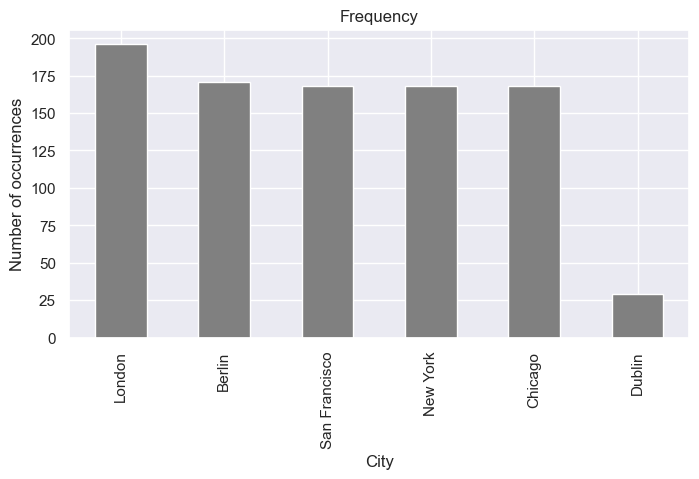

In [21]:
df["City"].value_counts().plot(kind="bar", figsize=(8,4),color="grey") #making a plot of the frequency of the values
plt.title("Frequency") 
plt.ylabel("Number of occurrences")


In [22]:
df["Weather Condition"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

Text(0, 0.5, 'Number of occurrences')

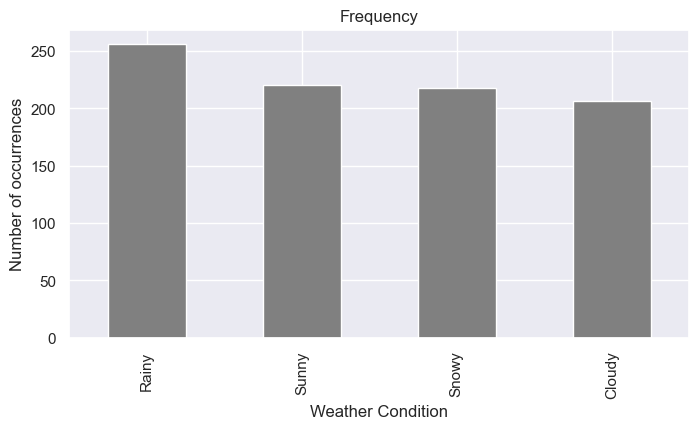

In [23]:
df["Weather Condition"].value_counts().plot(kind="bar", figsize=(8,4),color="grey") #making a plot of the frequency of the values
plt.title("Frequency") 
plt.ylabel("Number of occurrences")


In [24]:
df["Bike Model"].unique()

array(['Standard', 'Electric', 'Mountain', 'Manual'], dtype=object)

In [25]:
df['Bike Model'] = df['Bike Model'].replace(r'Manual', "Standard", regex=True)
df["Bike Model"].unique()

array(['Standard', 'Electric', 'Mountain'], dtype=object)

Text(0, 0.5, 'Number of occurrences')

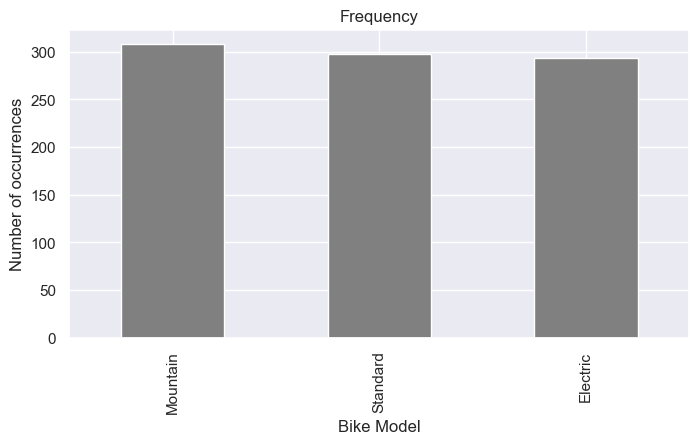

In [26]:
df["Bike Model"].value_counts().plot(kind="bar", figsize=(8,4),color="grey") #making a plot of the frequency of the values
plt.title("Frequency") 
plt.ylabel("Number of occurrences")


In [27]:
df["Rider Satisfaction"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

Text(0, 0.5, 'Number of occurrences')

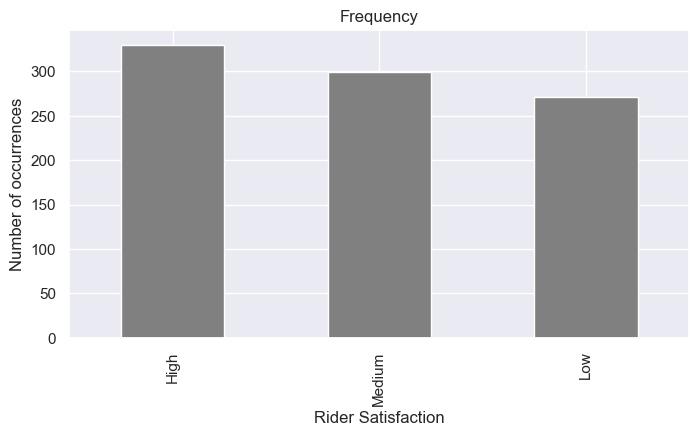

In [28]:
df["Rider Satisfaction"].value_counts().plot(kind="bar", figsize=(8,4),color="grey") #making a plot of the frequency of the values
plt.title("Frequency") 
plt.ylabel("Number of occurrences")


## Behaviour of numerical variables across categories

### CITIES

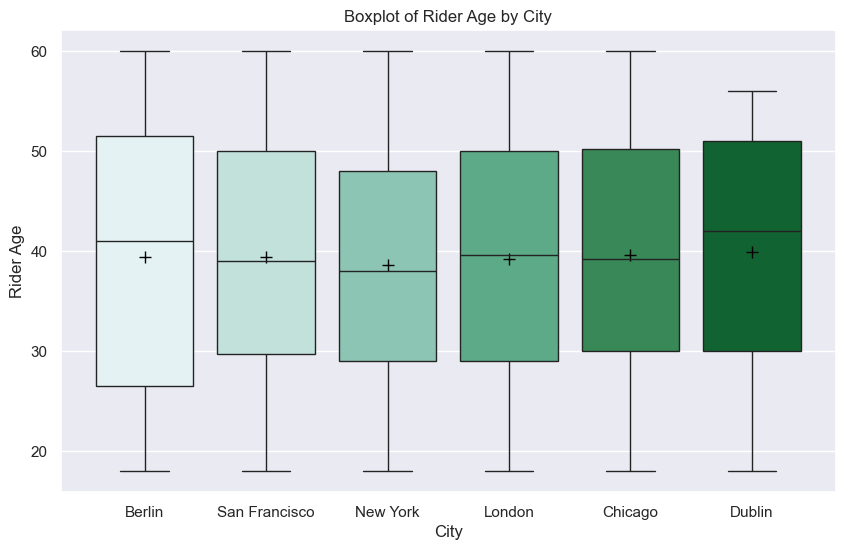

In [29]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Rider Age' by 'City'
ax = sns.boxplot(x='City', y='Rider Age', data=df, palette='BuGn')

# Calculate the mean values for 'Rider Age' per city
mean_values = df.groupby('City')['Rider Age'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['City'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Rider Age by City')

# Show the plot
plt.show()

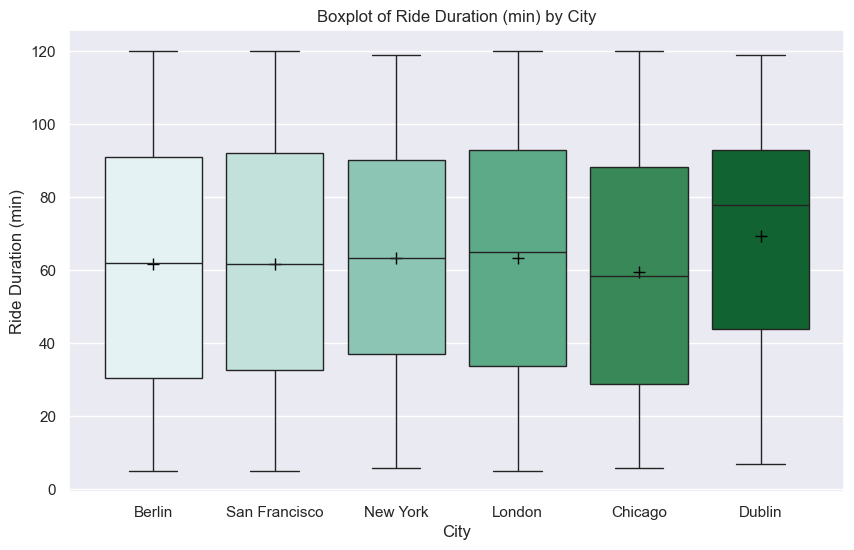

In [30]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Ride Duration (min)' by 'City'
ax = sns.boxplot(x='City', y='Ride Duration (min)', data=df, palette='BuGn')

# Calculate the mean values for 'Ride Duration (min)' per city
mean_values = df.groupby('City')['Ride Duration (min)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['City'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Ride Duration (min) by City')

# Show the plot
plt.show()

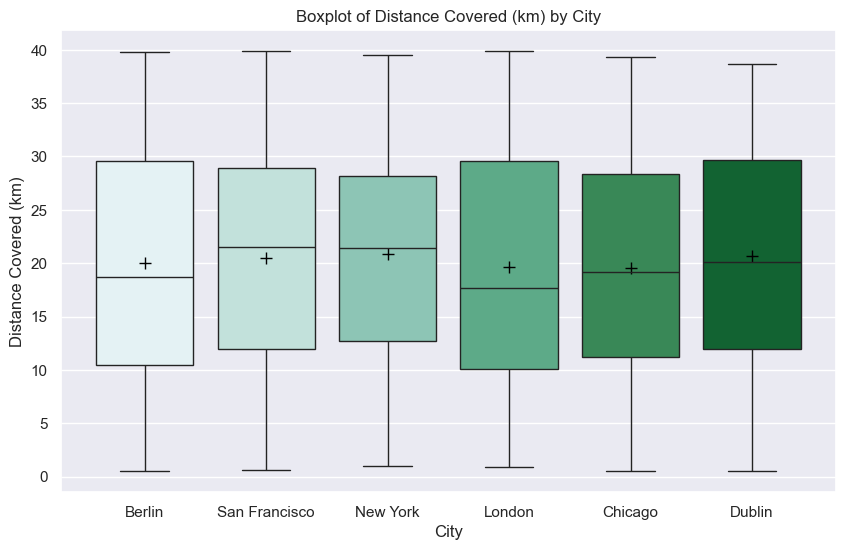

In [31]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Distance Covered (km)' by 'City'
ax = sns.boxplot(x='City', y='Distance Covered (km)', data=df, palette='BuGn')

# Calculate the mean values for 'Distance Covered (km)' per city
mean_values = df.groupby('City')['Distance Covered (km)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['City'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Distance Covered (km) by City')

# Show the plot
plt.show()

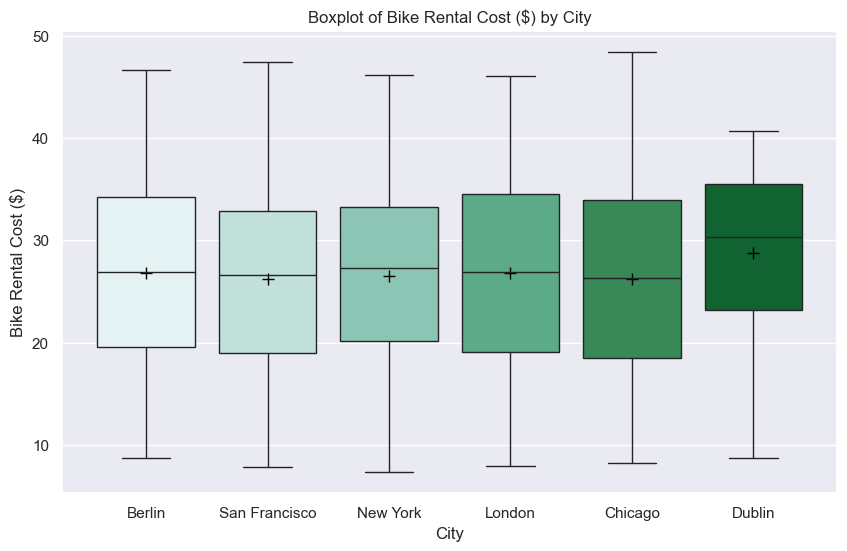

In [32]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Bike Rental Cost ($)' by 'City'
ax = sns.boxplot(x='City', y='Bike Rental Cost ($)', data=df, palette='BuGn')

# Calculate the mean values for 'Bike Rental Cost ($)' per city
mean_values = df.groupby('City')['Bike Rental Cost ($)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['City'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Bike Rental Cost ($) by City')

# Show the plot
plt.show()

### Weather Conditions

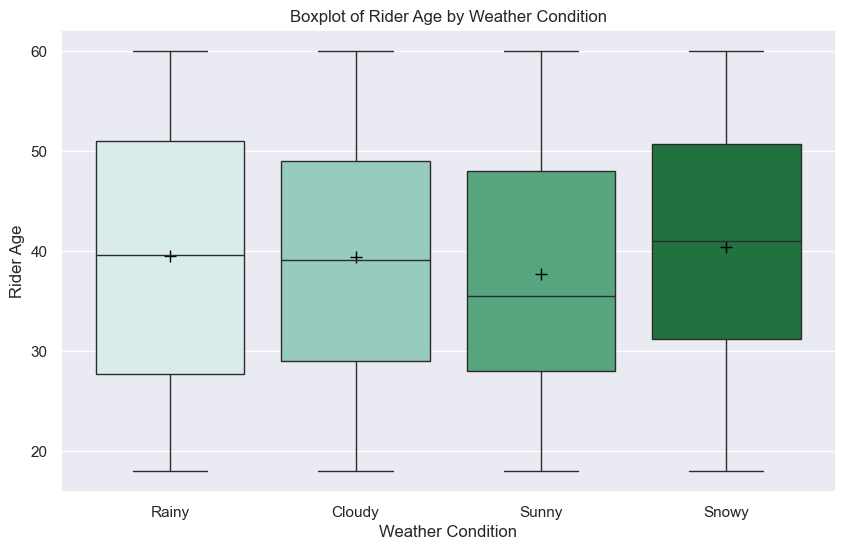

In [33]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Rider Age' by 'Weather Condition'
ax = sns.boxplot(x='Weather Condition', y='Rider Age', data=df, palette='BuGn')

# Calculate the mean values for 'Rider Age' per Weather Condition
mean_values = df.groupby('Weather Condition')['Rider Age'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Weather Condition'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Rider Age by Weather Condition')

# Show the plot
plt.show()

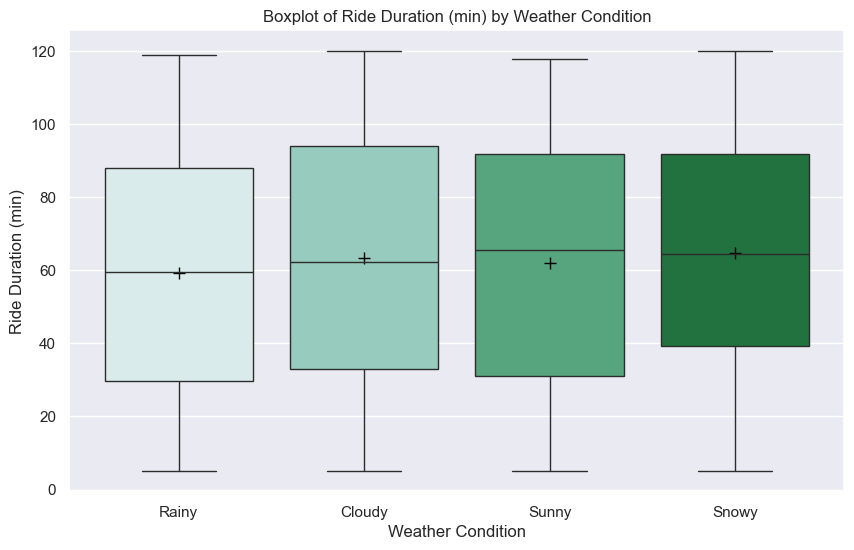

In [34]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Ride Duration (min)' by 'Weather Condition'
ax = sns.boxplot(x='Weather Condition', y='Ride Duration (min)', data=df, palette='BuGn')

# Calculate the mean values for 'Ride Duration (min)' per Weather Condition
mean_values = df.groupby('Weather Condition')['Ride Duration (min)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Weather Condition'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Ride Duration (min) by Weather Condition')

# Show the plot
plt.show()

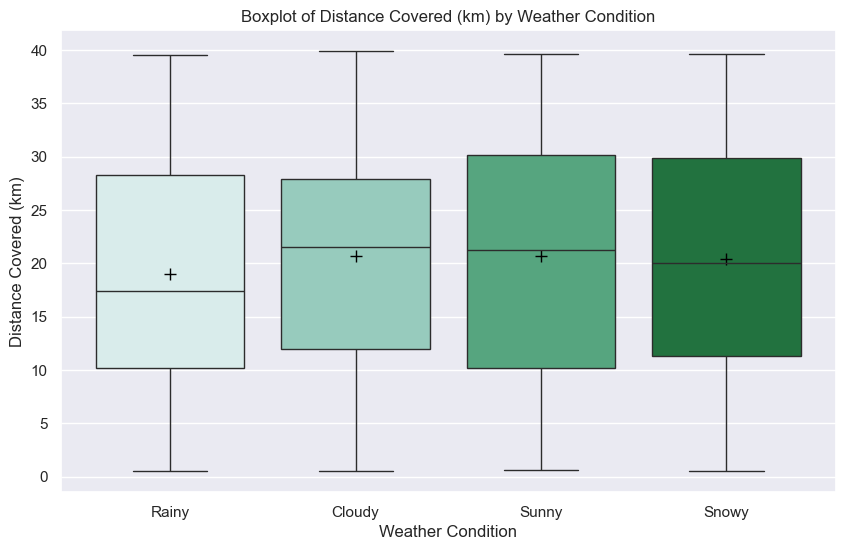

In [35]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Distance Covered (km)' by 'Weather Condition'
ax = sns.boxplot(x='Weather Condition', y='Distance Covered (km)', data=df, palette='BuGn')

# Calculate the mean values for 'Distance Covered (km)' per Weather Condition
mean_values = df.groupby('Weather Condition')['Distance Covered (km)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Weather Condition'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Distance Covered (km) by Weather Condition')

# Show the plot
plt.show()

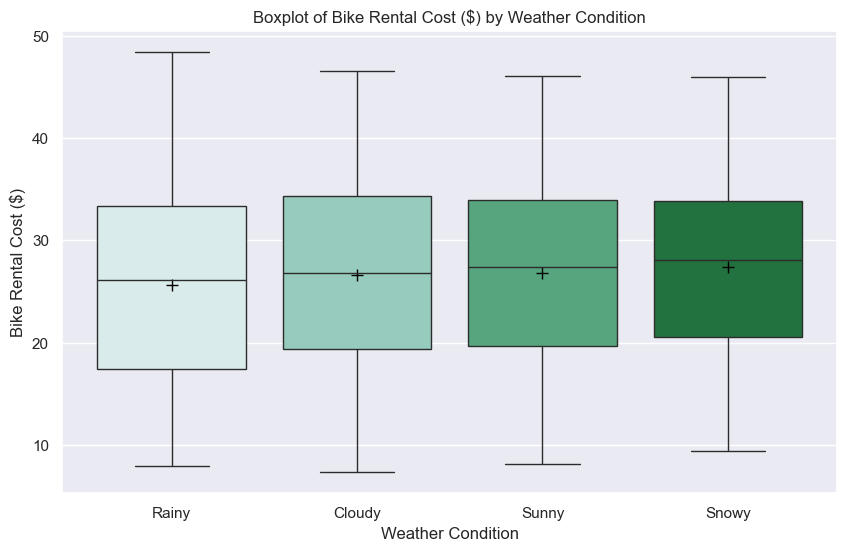

In [36]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Bike Rental Cost ($)' by 'Weather Condition'
ax = sns.boxplot(x='Weather Condition', y='Bike Rental Cost ($)', data=df, palette='BuGn')

# Calculate the mean values for 'Bike Rental Cost ($)' per Weather Condition
mean_values = df.groupby('Weather Condition')['Bike Rental Cost ($)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Weather Condition'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Bike Rental Cost ($) by Weather Condition')

# Show the plot
plt.show()

### Bike Models

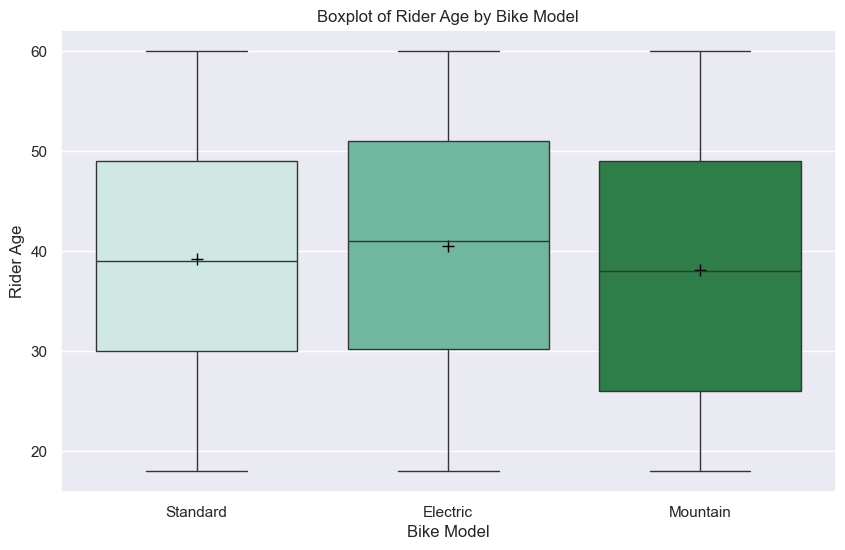

In [37]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Rider Age' by 'Bike Model'
ax = sns.boxplot(x='Bike Model', y='Rider Age', data=df, palette='BuGn')

# Calculate the mean values for 'Rider Age' per Bike Model
mean_values = df.groupby('Bike Model')['Rider Age'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Bike Model'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Rider Age by Bike Model')

# Show the plot
plt.show()

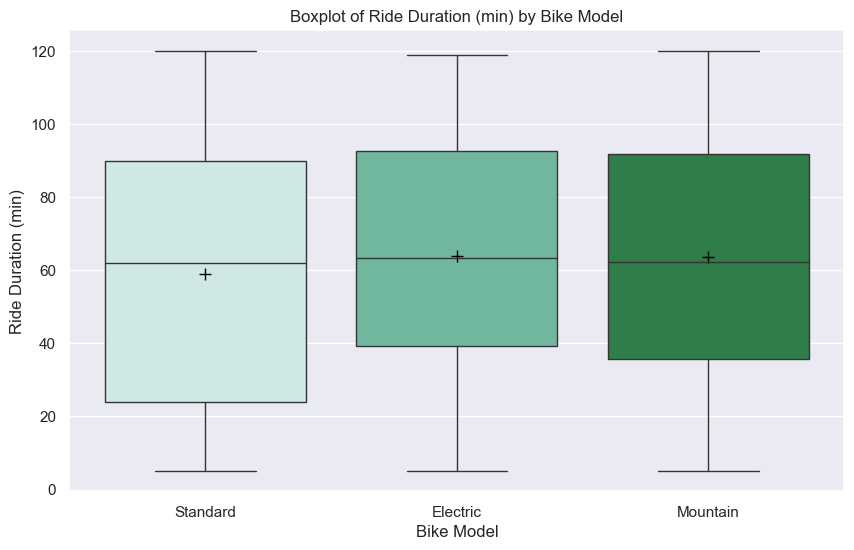

In [38]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Ride Duration (min)' by 'Bike Model'
ax = sns.boxplot(x='Bike Model', y='Ride Duration (min)', data=df, palette='BuGn')

# Calculate the mean values for 'Ride Duration (min)' per Bike Model
mean_values = df.groupby('Bike Model')['Ride Duration (min)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Bike Model'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Ride Duration (min) by Bike Model')

# Show the plot
plt.show()

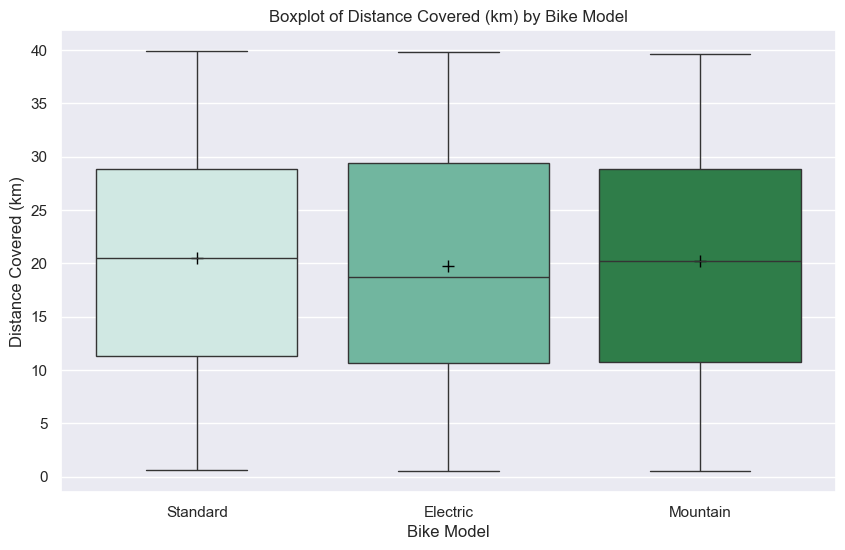

In [39]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Distance Covered (km)' by 'Bike Model'
ax = sns.boxplot(x='Bike Model', y='Distance Covered (km)', data=df, palette='BuGn')

# Calculate the mean values for 'Distance Covered (km)' per Bike Model
mean_values = df.groupby('Bike Model')['Distance Covered (km)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Bike Model'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Distance Covered (km) by Bike Model')

# Show the plot
plt.show()

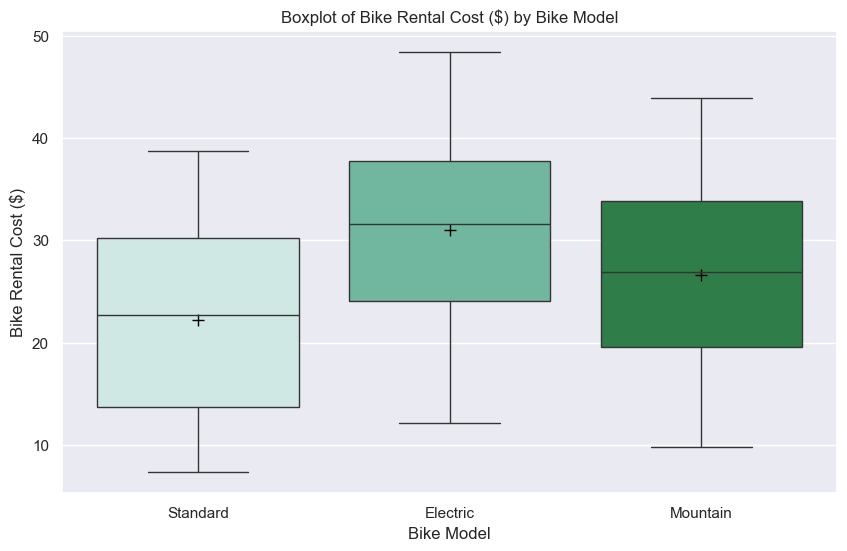

In [40]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Bike Rental Cost ($)' by 'Bike Model'
ax = sns.boxplot(x='Bike Model', y='Bike Rental Cost ($)', data=df, palette='BuGn')

# Calculate the mean values for 'Bike Rental Cost ($)' per Bike Model
mean_values = df.groupby('Bike Model')['Bike Rental Cost ($)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Bike Model'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Bike Rental Cost ($) by Bike Model')

# Show the plot
plt.show()

### Rider Satisfaction

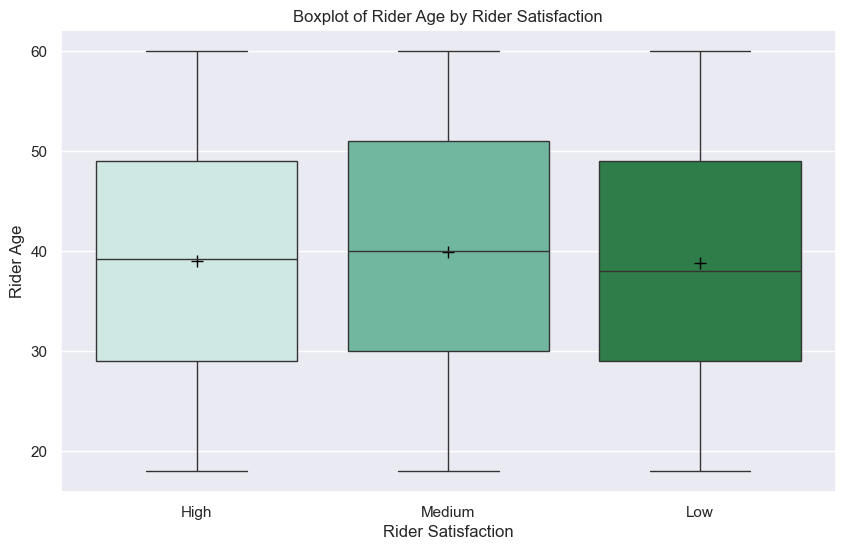

In [41]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Rider Age' by 'Rider Satisfaction'
ax = sns.boxplot(x='Rider Satisfaction', y='Rider Age', data=df, palette='BuGn')

# Calculate the mean values for 'Rider Age' per Rider Satisfaction
mean_values = df.groupby('Rider Satisfaction')['Rider Age'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Rider Satisfaction'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Rider Age by Rider Satisfaction')

# Show the plot
plt.show()

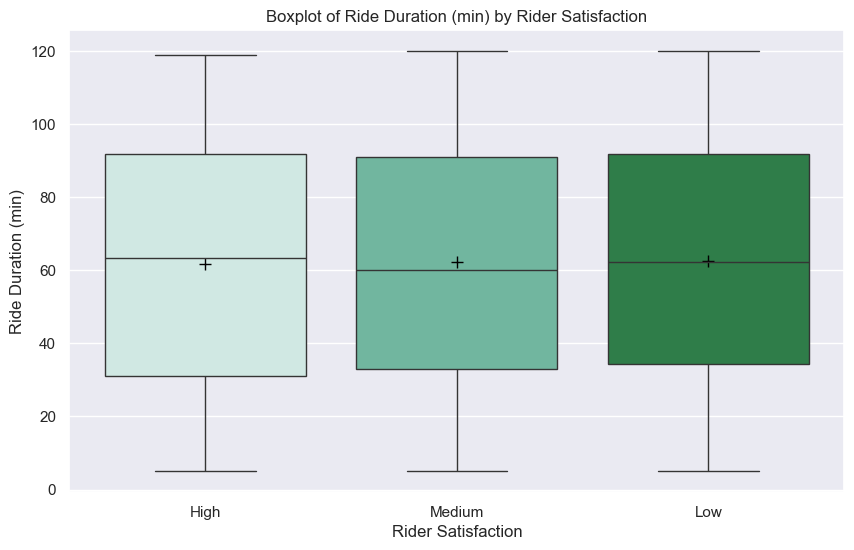

In [42]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Ride Duration (min)' by 'Rider Satisfaction'
ax = sns.boxplot(x='Rider Satisfaction', y='Ride Duration (min)', data=df, palette='BuGn')

# Calculate the mean values for 'Ride Duration (min)' per Rider Satisfaction
mean_values = df.groupby('Rider Satisfaction')['Ride Duration (min)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Rider Satisfaction'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Ride Duration (min) by Rider Satisfaction')

# Show the plot
plt.show()

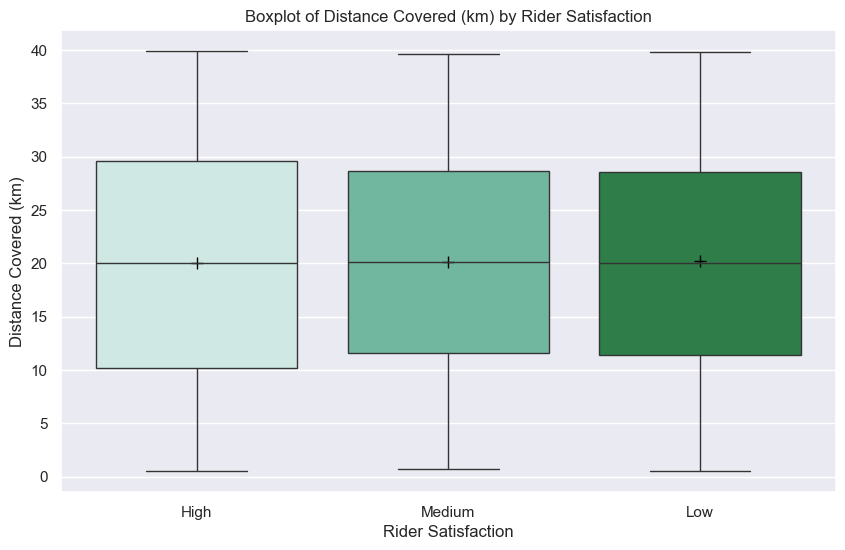

In [43]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Distance Covered (km)' by 'Rider Satisfaction'
ax = sns.boxplot(x='Rider Satisfaction', y='Distance Covered (km)', data=df, palette='BuGn')

# Calculate the mean values for 'Distance Covered (km)' per Rider Satisfaction
mean_values = df.groupby('Rider Satisfaction')['Distance Covered (km)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Rider Satisfaction'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Distance Covered (km) by Rider Satisfaction')

# Show the plot
plt.show()

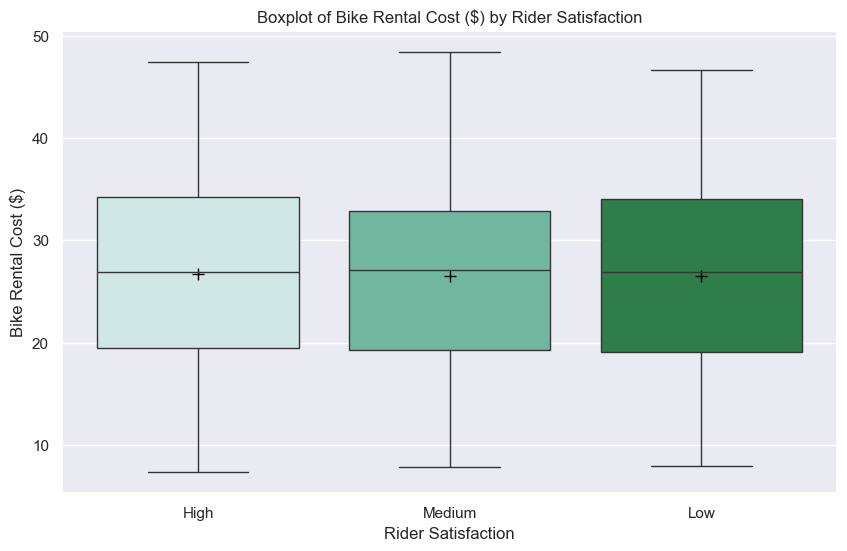

In [44]:
# Set up a matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Create a boxplot for 'Bike Rental Cost ($)' by 'Rider Satisfaction'
ax = sns.boxplot(x='Rider Satisfaction', y='Bike Rental Cost ($)', data=df, palette='BuGn')

# Calculate the mean values for 'Bike Rental Cost ($)' per Rider Satisfaction
mean_values = df.groupby('Rider Satisfaction')['Bike Rental Cost ($)'].mean()

# Overlay mean values on the boxplot
for i, category in enumerate(df['Rider Satisfaction'].unique()):
    ax.plot(i, mean_values[category], marker='+', color='black', markersize=8)

# Add a title for the plot
plt.title('Boxplot of Bike Rental Cost ($) by Rider Satisfaction')

# Show the plot
plt.show()

3. Apply encoding, scaling and feature engineering as and if required, detailing how and why you used
these techniques and the rationale for your decisions.

### Encoding Categorical Data

In [45]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,Berlin,Rainy,53.0,Standard,62.0,2.25,High,22.63
1,San Francisco,Cloudy,39.0,Standard,5.0,21.67,Medium,7.87
2,Berlin,Sunny,43.0,Electric,106.0,28.40,High,39.40
3,San Francisco,Cloudy,24.0,Standard,119.0,5.66,Low,37.63
4,New York,Sunny,24.0,Mountain,11.0,25.74,Low,13.12


In [46]:
le=LabelEncoder() 

df["City"]=le.fit_transform(df["City"]) 
df["Bike Model"]=le.fit_transform(df["Bike Model"]) 


#we are using ordinal encoding because these variables are categorical and ordinal. The relationship is shown by the natural order of the integers

df['Weather Condition'] = df['Weather Condition'].map({'Snowy': 0,'Rainy': 1, 'Cloudy': 2, 'Sunny': 3})
df['Rider Satisfaction'] = df['Rider Satisfaction'].map({'Low': 0,'Medium': 1,'High': 2})

In [47]:
df.head()

,City,Weather Condition,Rider Age,Bike Model,Ride Duration (min),Distance Covered (km),Rider Satisfaction,Bike Rental Cost ($)
0,0,1,53.0,2,62.0,2.25,2,22.63
1,5,2,39.0,2,5.0,21.67,1,7.87
2,0,3,43.0,0,106.0,28.40,2,39.40
3,5,2,24.0,2,119.0,5.66,0,37.63
4,4,3,24.0,1,11.0,25.74,0,13.12


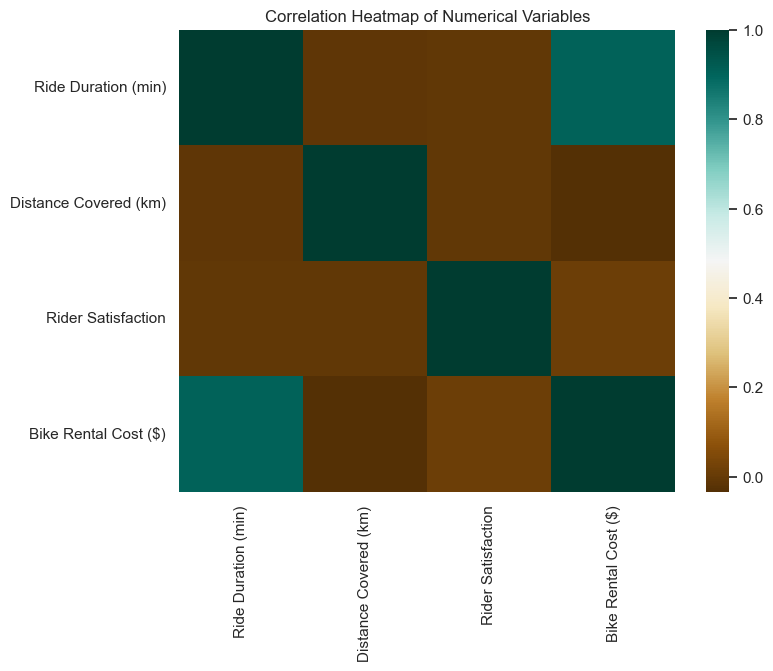

In [48]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['Ride Duration (min)', 'Distance Covered (km)', 'Rider Satisfaction', 'Bike Rental Cost ($)']].corr()
sns.heatmap(corr_matrix, cmap='BrBG')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show() 

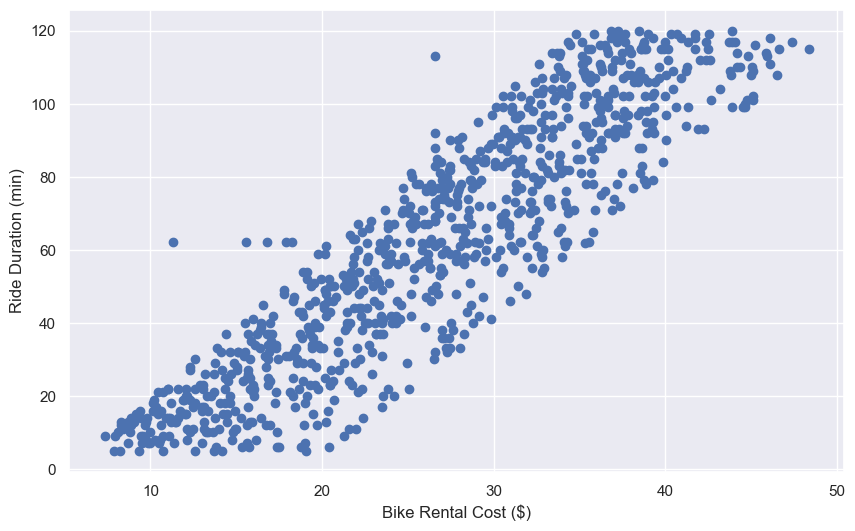

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Bike Rental Cost ($)"], df["Ride Duration (min)"])
ax.set_xlabel("Bike Rental Cost ($)")
ax.set_ylabel("Ride Duration (min)")
plt.show() #important correlation between Cost and Ride Duration

In [50]:
from sklearn.decomposition import PCA 
pca = PCA().fit(df) #aplicando PCA
np.cumsum(pca.explained_variance_ratio_) #showing the values for choosing the number of components

array([0.80420675, 0.9043551 , 0.98622857, 0.99642435, 0.99857524,
       0.99938827, 0.99982352, 1.        ])

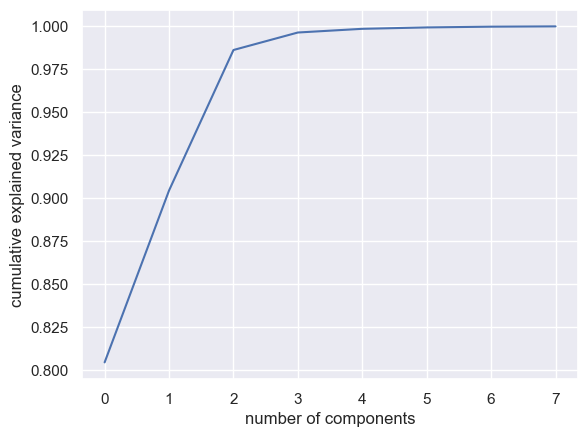

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #looking at the cumulative explained variance ratio as a function of the number of components
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

In [52]:
pca = PCA(2) #applying PCA with two components
projected = pca.fit_transform(df)

In [53]:
projected.shape #showing the number of features as a result of the dimensionally reduction.

(900, 2)

In [54]:
df_pca = pd.DataFrame(projected, columns =['C1','C2'])
df_pca.head()

,C1,C2
0,-1.159355,-12.958148
1,-60.081763,0.479426
2,45.531635,-4.238107
3,57.860580,15.686906
4,-52.938965,15.227863


In [63]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y)
X = df.drop('Rider Satisfaction', axis=1)  # Exclude target variable
y = df['Rider Satisfaction']  # Target variable

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [56]:
# Apply LDA (only for classification tasks)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

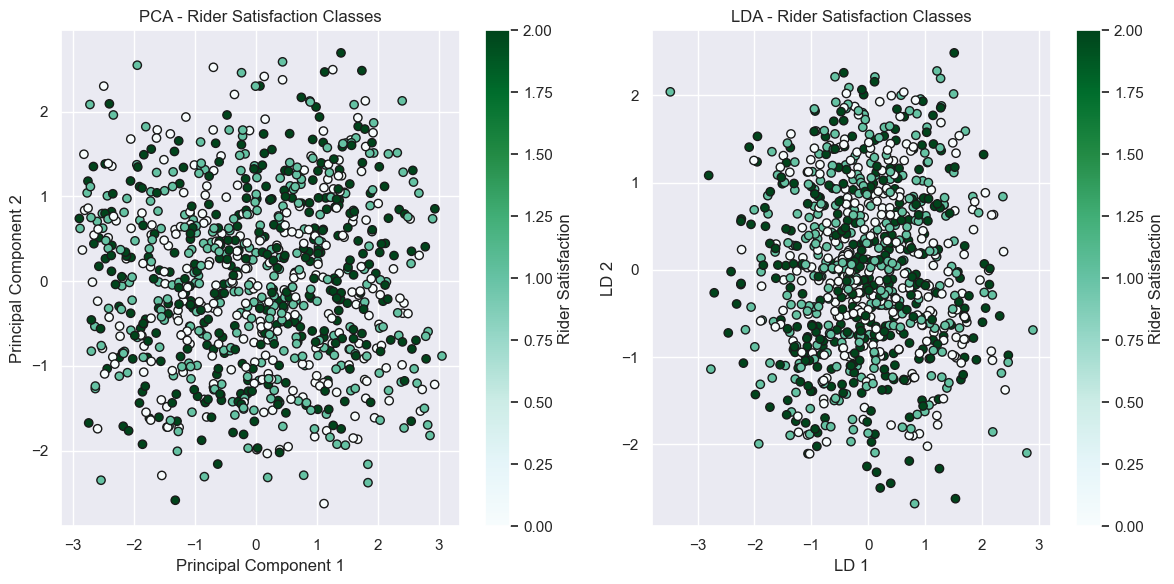

In [57]:
# Plotting the PCA result
plt.figure(figsize=(12, 6))

# PCA Plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='BuGn', edgecolor='k')
plt.title('PCA - Rider Satisfaction Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Rider Satisfaction')

# Plotting the LDA result
plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='BuGn', edgecolor='k')
plt.title('LDA - Rider Satisfaction Classes')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Rider Satisfaction')

plt.tight_layout()
plt.show()

#### MACHINE LEARNING


## k-Means Clustering

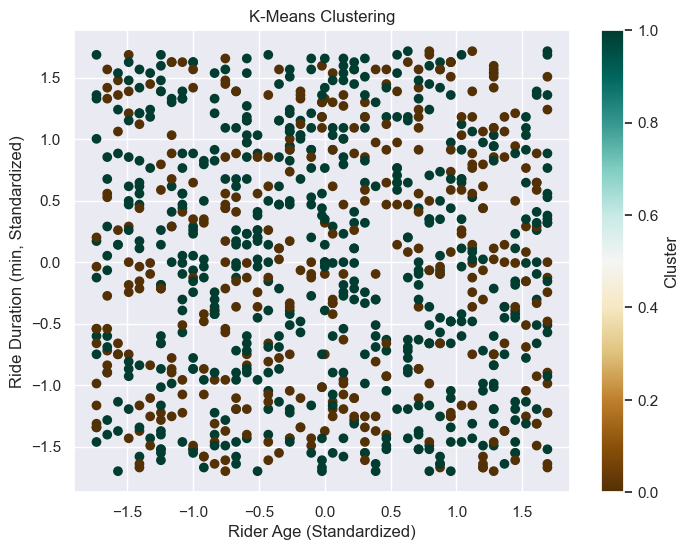

In [74]:
from sklearn.cluster import KMeans

# Standardize numerical features

numerical_cols = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#K-Means clustering
k = 2  # we need to give a initial value 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols + ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']])

# We will use only the two most important features for 2D visualization (we can choose others as well)
plt.figure(figsize=(8, 6))
plt.scatter(df['Rider Age'], df['Ride Duration (min)'], c=df['Cluster'], cmap='BrBG', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Rider Age (Standardized)')
plt.ylabel('Ride Duration (min, Standardized)')
plt.colorbar(label='Cluster')
plt.show()

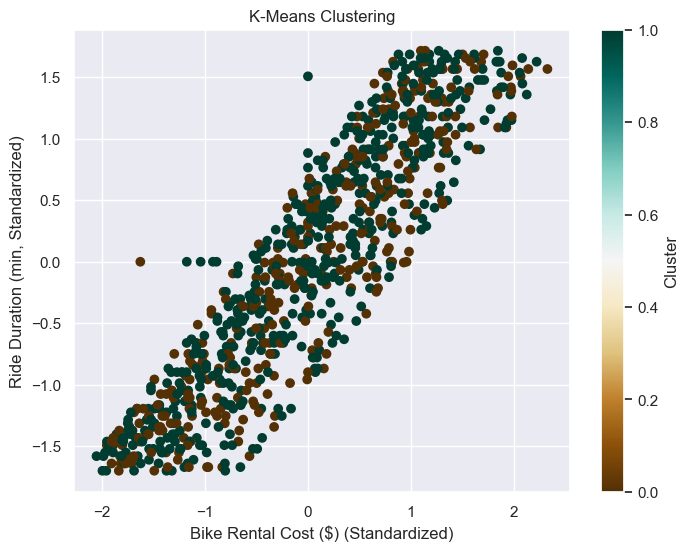

In [71]:
from sklearn.cluster import KMeans

# Standardize numerical features

numerical_cols = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#K-Means clustering
k = 2  # we need to give a initial value 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols + ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']])

# We will use only the two most important features for 2D visualization (we can choose others as well)
plt.figure(figsize=(8, 6))
plt.scatter(df['Bike Rental Cost ($)'], df['Ride Duration (min)'], c=df['Cluster'], cmap='BrBG', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Bike Rental Cost ($) (Standardized)')
plt.ylabel('Ride Duration (min, Standardized)')
plt.colorbar(label='Cluster')
plt.show()

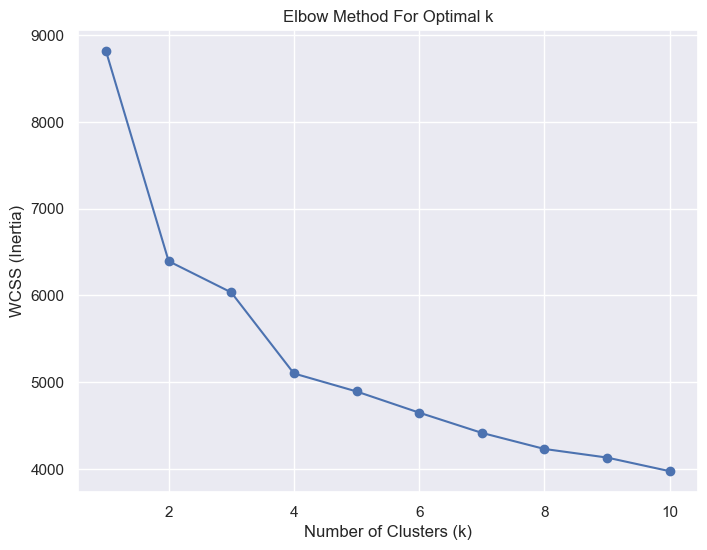

In [59]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols + ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']])
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

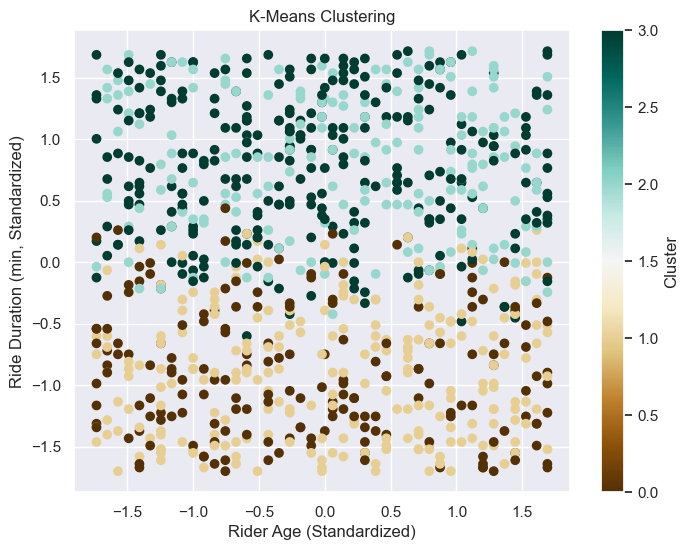

In [72]:
from sklearn.cluster import KMeans

# Standardize numerical features

numerical_cols = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#K-Means clustering
k = 4  # we need to give a initial value 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols + ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']])

# We will use only the two most important features for 2D visualization (we can choose others as well)
plt.figure(figsize=(8, 6))
plt.scatter(df['Rider Age'], df['Ride Duration (min)'], c=df['Cluster'], cmap='BrBG', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Rider Age (Standardized)')
plt.ylabel('Ride Duration (min, Standardized)')
plt.colorbar(label='Cluster')
plt.show()

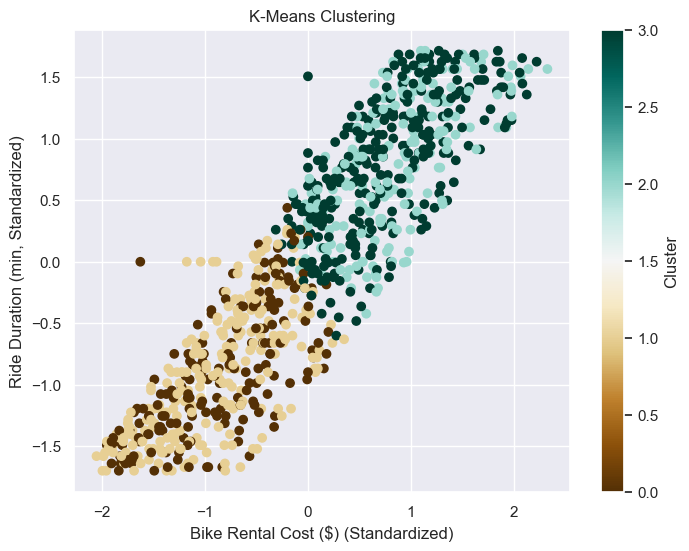

In [73]:
from sklearn.cluster import KMeans

# Standardize numerical features

numerical_cols = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#K-Means clustering
k = 4  # we need to give a initial value 
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_cols + ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']])

# We will use only the two most important features for 2D visualization (we can choose others as well)
plt.figure(figsize=(8, 6))
plt.scatter(df['Bike Rental Cost ($)'], df['Ride Duration (min)'], c=df['Cluster'], cmap='BrBG', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Bike Rental Cost ($) (Standardized)')
plt.ylabel('Ride Duration (min, Standardized)')
plt.colorbar(label='Cluster')
plt.show()

In [61]:
# Evaluate the clustering performance using Inertia (sum of squared distances to closest cluster center)
print(f'Inertia (Sum of squared distances to the closest center): {kmeans.inertia_}')

Inertia (Sum of squared distances to the closest center): 5102.081822289028


In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)

silhouette_scores = []

# Loop over each fold
for train_idx, test_idx in kf.split(X_scaled):
    # Split the data
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    
    # Fit KMeans on the training data
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_train)
    
    # Predict cluster labels for the test set
    cluster_labels = kmeans.predict(X_test)
    
    # Compute Silhouette Score for the test set
    sil_score = silhouette_score(X_test, cluster_labels)
    silhouette_scores.append(sil_score)

# Average silhouette score across folds
average_silhouette_score = np.mean(silhouette_scores)
print(f"Average Silhouette Score: {average_silhouette_score}")

Average Silhouette Score: 0.12852066223424136
